In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time 

In [2]:
def show_img(img,color):
    if color == 0:
        plt.imshow(img,cmap='gray')
        plt.show()
    else:
        plt.imshow(img)
        plt.show()
def exponn(x,y,s):
    s = s**2
    final = np.exp(-(((x-y)**2)/(2*s)))
    return final

def plottie_2d(m,n,images,strie):
    f, axarr = plt.subplots(m,n)
    f.set_figheight(5*m)
    f.set_figwidth(5*n)

    count = -1
    for i in range(m):
        for j in range(n):
            count+=1
            axarr[i,j].imshow(images[count],cmap='gray')

            axarr[i,j].set_title(strie[count])

    plt.show()

def plottie_1d(n,images,strie):
    f, axarr = plt.subplots(1,n)
    f.set_figheight(5*1)
    f.set_figwidth(5*n)

    for j in range(n):
        
        axarr[j].imshow(images[j],cmap='gray')

        axarr[j].set_title(strie[j])

    plt.show()
            
img = cv2.imread("../images/lambo.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

img_64 = cv2.resize(img, (64,64), interpolation = cv2.INTER_AREA)
img_128 = cv2.resize(img, (128,128), interpolation = cv2.INTER_AREA)
img_256 = cv2.resize(img, (256,256), interpolation = cv2.INTER_AREA)
img_512 = cv2.resize(img, (512,512), interpolation = cv2.INTER_AREA)
images_color = [img_64,img_128,img_256,img_512]

img_64_gray = cv2.cvtColor(img_64,cv2.COLOR_RGB2GRAY)
img_128_gray = cv2.cvtColor(img_128,cv2.COLOR_RGB2GRAY)
img_256_gray = cv2.cvtColor(img_256,cv2.COLOR_RGB2GRAY)
img_512_gray = cv2.cvtColor(img_512,cv2.COLOR_RGB2GRAY)
images_gray = [img_64_gray,img_128_gray,img_256_gray,img_512_gray]

# Question 1.1 and 1.2 and 1.4 implemented in the below cell

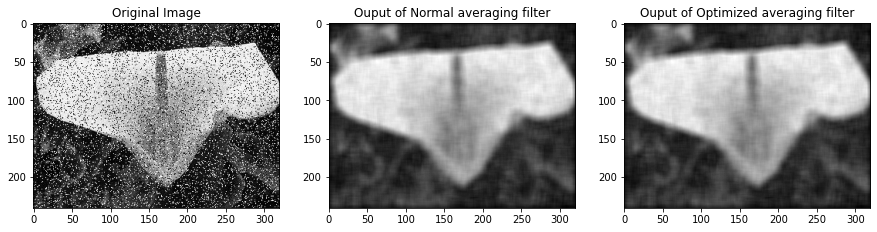

In [3]:
"""

1.1

"""

def lin_filter(img,filt,k):

    m,n = img.shape

    img_pad = np.zeros((m+((k//2)*2),n+((k//2)*2))) # Creating the padded image
    m_pad,n_pad = img_pad.shape


    img_pad[k//2:m_pad-k//2,k//2:n_pad-k//2] = img # Including the image in the padded image

    img_final = np.zeros_like(img_pad) # Creating the final image

    for i in range(k//2,m_pad-(k//2)): 

        for j in range(k//2,n_pad-(k//2)): 

            row_right = j + k//2 + 1
            row_left = j - k//2
            column_bottom = i+k//2+1
            column_top = i - k//2
            img_slice = img_pad[column_top:column_bottom,row_left:row_right]
            img_final[i,j] = np.sum(np.multiply(img_slice,filt))

    img_finalest = img_final[k//2:m_pad-k//2,k//2:n_pad-k//2]

    return img_finalest

def med_filter(img,filt,k):

    m,n = img.shape

    img_pad = np.zeros((m+((k//2)*2),n+((k//2)*2))) # Creating the padded image
    m_pad,n_pad = img_pad.shape


    img_pad[k//2:m_pad-k//2,k//2:n_pad-k//2] = img # Including the image in the padded image

    img_final = np.zeros_like(img_pad) # Creating the final image

    for i in range(k//2,m_pad-(k//2)):

        for j in range(k//2,n_pad-(k//2)):

            row_right = j + k//2 + 1
            row_left = j - k//2
            column_bottom = i+k//2+1
            column_top = i - k//2
            img_slice = img_pad[column_top:column_bottom,row_left:row_right]
            img_final[i,j] = np.median(img_slice)

    img_finalest = img_final[k//2:m_pad-k//2,k//2:n_pad-k//2]

    return np.asarray(img_finalest)


"""

1.2

"""

def lin_filter_optim(img,filt,k):

    m,n = img.shape

    img_pad = np.zeros((m+((k//2)*2),n+((k//2)*2)))# Creating the padded image
    m_pad,n_pad = img_pad.shape


    img_pad[k//2:m_pad-k//2,k//2:n_pad-k//2] = img # Including the image in the padded image

    img_final = np.zeros_like(img_pad) # Creating the final image
#     print(filt)

    for i in range(k//2,m_pad-(k//2)): 

        column_bottom = i+k//2+1
        column_top = i - k//2

        img_slice = img_pad[column_top:column_bottom,0:k]
        img_final[i,k//2] = np.sum(np.multiply(img_slice,filt))
        sum_first = np.sum(np.multiply(img_slice,filt))

        for j in range(k//2+1,n_pad-(k//2)): 

            sum_left = np.sum(img_pad[column_top:column_bottom,j-k//2-1])/(k**2)

            sum_first-=sum_left
            sum_first+= np.sum(img_pad[column_top:column_bottom,j+k//2])/(k**2)
            
            img_final[i,j] = sum_first

        img_finalest = img_final[k//2:m_pad-k//2,k//2:n_pad-k//2]

    return img_finalest

def med_filter_optim(img,filt,k):
    
    m,n = img.shape

    img_pad = np.zeros((m+((k//2)*2),n+((k//2)*2)),dtype=np.uint8) # Creating the padded image
    m_pad,n_pad = img_pad.shape

    img_pad[k//2:m_pad-k//2,k//2:n_pad-k//2] = img # Including the image in the padded image
    
    img_final = np.zeros(img_pad.shape,dtype=np.uint8)   
    
    
    for row in range(m_pad-k+1): 
        
        slicey = img_pad[row:row+k, 0:k]
        
        hist = np.zeros(256,dtype=np.uint8)
        
        for i in range(k):
            for j in range(k):
                hist[slicey[i,j]]+=1
            
        img_final[row,0] = np.searchsorted(np.cumsum(hist), (k**2)//2)
        
        for col in range(1, n_pad-k+1):
            
            for k1 in range(0, k):
                
                hist[img_pad[row+k1,col+k-1]] += 1
                hist[img_pad[row+k1,col-1]] -= 1
                
            s = np.cumsum(hist)
            img_final[row,col] = np.searchsorted(np.cumsum(hist), k*k//2)
    return img_final

img = cv2.imread("../images/Noisy.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
k=11
filt = np.ones((k,k))/(k**2)
img_n = lin_filter(img,filt,k)
img_o = lin_filter_optim(img,filt,k)

images = [img,img_n,img_o]
strie = ['Original Image', 'Ouput of Normal averaging filter','Ouput of Optimized averaging filter']
plottie_1d(3,images,strie)


# 5.3

In [42]:
k_val = np.arange(1,301,50)
normal_time_0 = []
optim_time_0 = []
for k in k_val:
    
    filt = np.ones((k,k))/(k**2)
    t0 = time.time()
    img_n = lin_filter(images_gray[0],filt,k)
    t1 = time.time()
    normal_time_0.append(t1-t0)

    t0 = time.time()
    img_o = lin_filter_optim(images_gray[0],filt,k)
    t1 = time.time()
    optim_time_0.append(t1-t0)

print("check0")
normal_time_1 = []
optim_time_1 = []
for k in k_val:
    
    filt = np.ones((k,k))/(k**2)
    t0 = time.time()
    img_n = lin_filter(images_gray[1],filt,k)
    t1 = time.time()
    normal_time_1.append(t1-t0)

    t0 = time.time()
    img_o = lin_filter_optim(images_gray[1],filt,k)
    t1 = time.time()
    optim_time_1.append(t1-t0)
    
print("check0")
normal_time_2 = []
optim_time_2 = []
for k in k_val:
    
    filt = np.ones((k,k))/(k**2)
    t0 = time.time()
    img_n = lin_filter(images_gray[2],filt,k)
    t1 = time.time()
    normal_time_2.append(t1-t0)

    t0 = time.time()
    img_o = lin_filter_optim(images_gray[2],filt,k)
    t1 = time.time()
    optim_time_2.append(t1-t0)

print("check0")
normal_time_3 = []
optim_time_3 = []
for k in k_val:
    
    filt = np.ones((k,k))/(k**2)
    t0 = time.time()
    img_n = lin_filter(images_gray[3],filt,k)
    t1 = time.time()
    normal_time_3.append(t1-t0)

    t0 = time.time()
    img_o = lin_filter_optim(images_gray[3],filt,k)
    t1 = time.time()
    optim_time_3.append(t1-t0)

print("check0")


check0
check0
check0
check0


Text(0.5, 0.98, 'K values vs Run time for various sized images (Linear filter)')

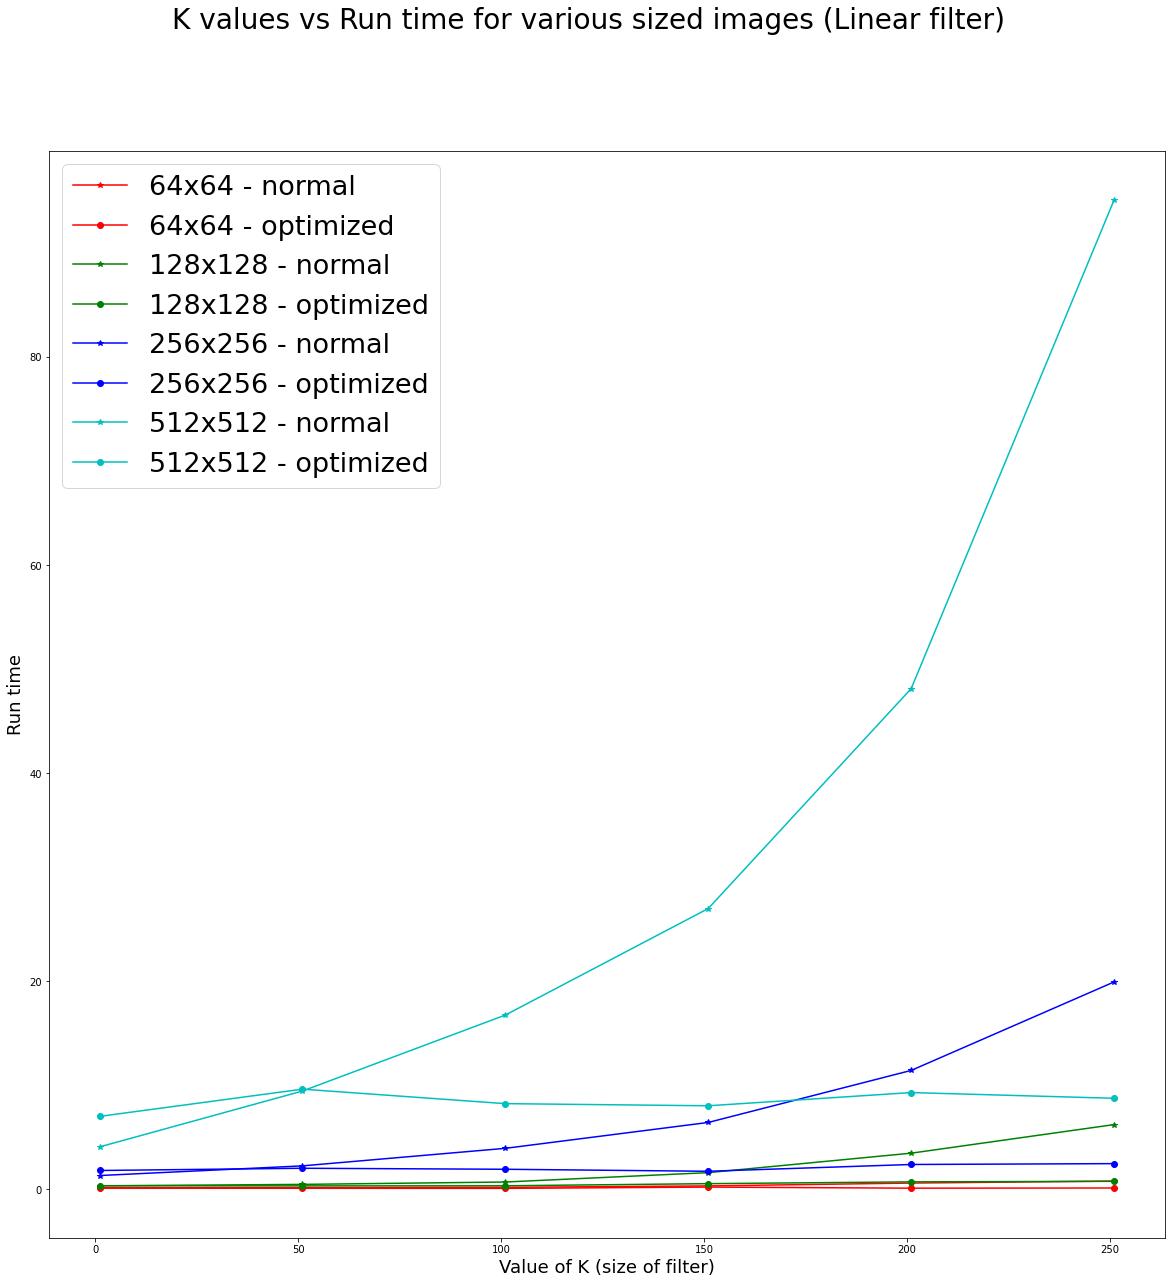

In [262]:
# plt.plot(k_val,time_dft, 'b',x_val,time_fft, 'r')
# plt.legend(['DFT','FFT'])
# plt.xlabel('Image Size', fontsize=18)
# plt.ylabel('Run time', fontsize=16)
# plt.show()

  
f, axarr = plt.subplots(1,1)
f.set_figheight(20)
f.set_figwidth(20)

line_colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', '#eeefff']

axarr.plot(k_val,normal_time_0, color ='r', marker='*')

axarr.plot(k_val,optim_time_0, color ='r', marker='o')

axarr.plot(k_val,normal_time_1, color ='g', marker='*')

axarr.plot(k_val,optim_time_1, color ='g', marker='o')

axarr.plot(k_val,normal_time_2, color ='b', marker='*')

axarr.plot(k_val,optim_time_2, color ='b', marker='o')

axarr.plot(k_val,normal_time_3, color ='c', marker='*')

axarr.plot(k_val,optim_time_3, color ='c', marker='o')
# axarr.legend(['64x64 - normal','64x64 - optimized'])

# axarr.plot(k_val,normal_time_1, '--+')
# axarr.legend(['128x128 - normal'])

# axarr.plot(k_val,optim_time_1, '--ob')
# axarr.legend(['128x128 - optimized'])


# axarr.plot(k_val,normal_time_1,k_val,optim_time_1, '--bo')
# axarr.legend(['256x256 - normal','256x256 - optimized'])

# axarr.plot(k_val,normal_time_2,k_val,optim_time_2, '--bo')
# axarr.legend(['256x256 - normal','256x256 - optimized'])

# axarr.plot(k_val,normal_time_3,k_val,optim_time_3, '--bo')
# axarr.legend(['512x512 - normal','512x512 - optimized'])

axarr.legend(['64x64 - normal','64x64 - optimized','128x128 - normal','128x128 - optimized','256x256 - normal','256x256 - optimized','512x512 - normal','512x512 - optimized'],prop={'size': 27})
axarr.set_xlabel('Value of K (size of filter)', fontsize=18)
axarr.set_ylabel('Run time', fontsize=18)
f.suptitle('K values vs Run time for various sized images (Linear filter)', fontsize=28)


# plt.plot(k_val,normal_time_0,k_val,optim_time_0, c=line_colors[0])
# plt.plot(k_val,normal_time_1,k_val,optim_time_1, c=line_colors[1])
# plt.plot(k_val,normal_time_2,k_val,optim_time_2, c=line_colors[2])


In [4]:
k_val = np.arange(1,51,3)
normal_time_0 = []
optim_time_0 = []
for k in k_val:
    
    filt = np.ones((k,k))/(k**2)
    t0 = time.time()
    img_n = med_filter(images_gray[0],filt,k)
    t1 = time.time()
    normal_time_0.append(t1-t0)

    t0 = time.time()
    img_o = med_filter_optim(images_gray[0],filt,k)
    t1 = time.time()
    optim_time_0.append(t1-t0)

print("check0")
normal_time_1 = []
optim_time_1 = []
for k in k_val:
    
    filt = np.ones((k,k))/(k**2)
    t0 = time.time()
    img_n = med_filter(images_gray[1],filt,k)
    t1 = time.time()
    normal_time_1.append(t1-t0)

    t0 = time.time()
    img_o = med_filter_optim(images_gray[1],filt,k)
    t1 = time.time()
    optim_time_1.append(t1-t0)
    
print("check0")
normal_time_2 = []
optim_time_2 = []
for k in k_val:
    
    filt = np.ones((k,k))/(k**2)
    t0 = time.time()
    img_n = med_filter(images_gray[2],filt,k)
    t1 = time.time()
    normal_time_2.append(t1-t0)

    t0 = time.time()
    img_o = med_filter_optim(images_gray[2],filt,k)
    t1 = time.time()
    optim_time_2.append(t1-t0)

print("check0")
# normal_time_3 = []
# optim_time_3 = []
# for k in k_val:
    
#     filt = np.ones((k,k))/(k**2)
#     t0 = time.time()
#     img_n = med_filter(images_gray[3],filt,k)
#     t1 = time.time()
#     normal_time_3.append(t1-t0)

#     t0 = time.time()
#     img_o = med_filter_optim(images_gray[3],filt,k)
#     t1 = time.time()
#     optim_time_3.append(t1-t0)

# print("check0")


check0
check0
check0


Text(0.5, 0.98, 'K values vs Run time for various sized images (Median filter)')

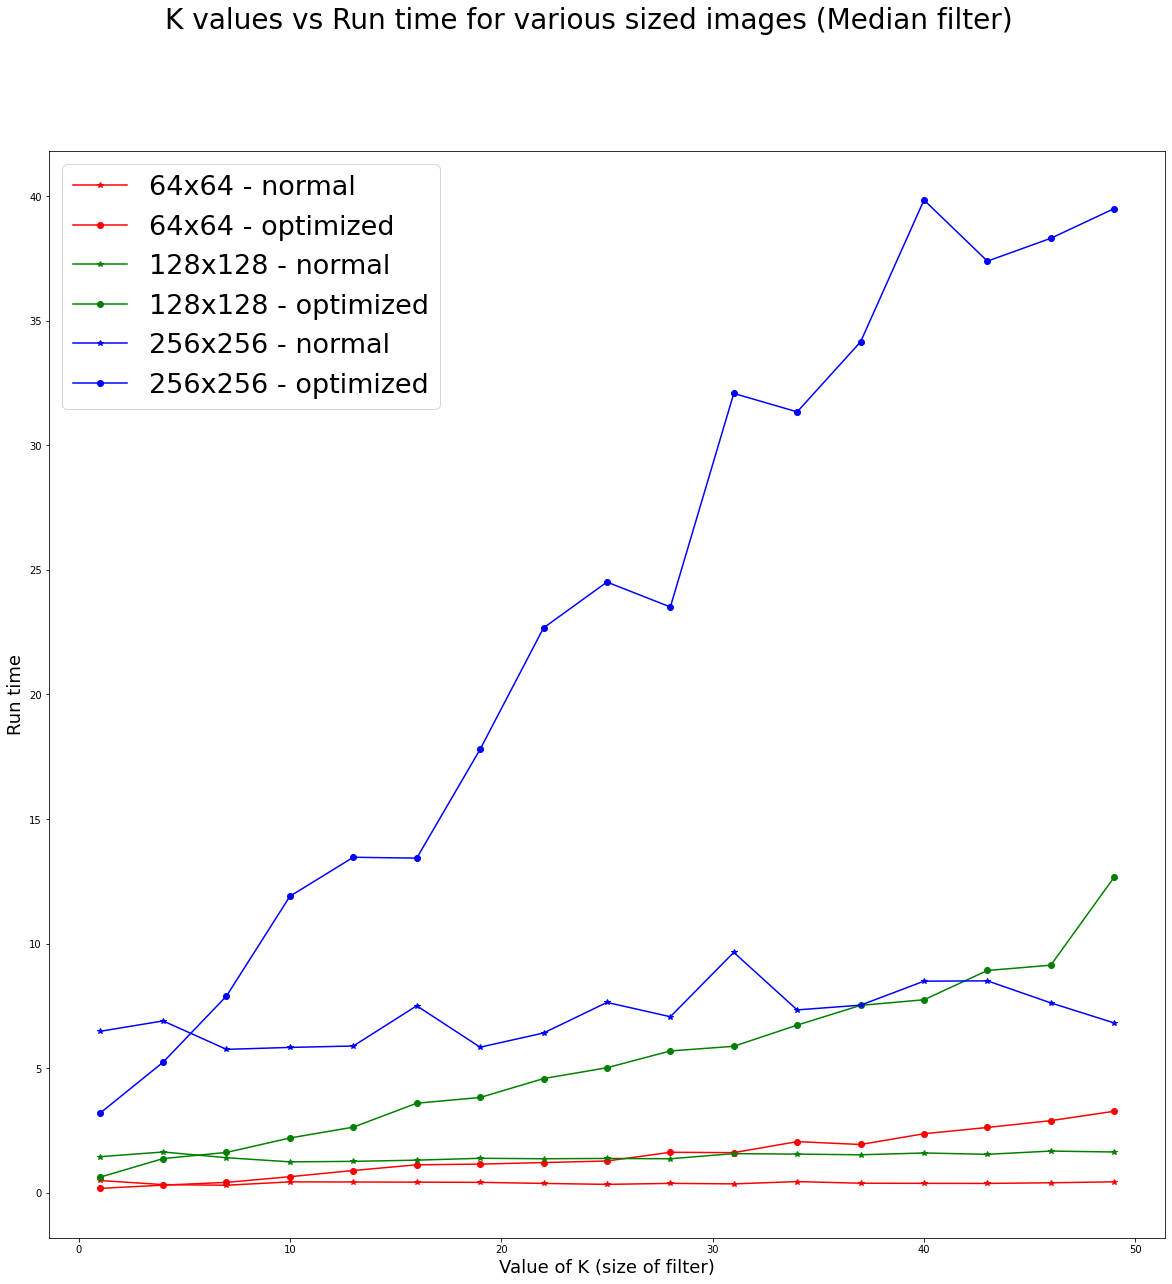

In [5]:
# plt.plot(k_val,time_dft, 'b',x_val,time_fft, 'r')
# plt.legend(['DFT','FFT'])
# plt.xlabel('Image Size', fontsize=18)
# plt.ylabel('Run time', fontsize=16)
# plt.show()

  
f, axarr = plt.subplots(1,1)
f.set_figheight(20)
f.set_figwidth(20)

line_colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', '#eeefff']

axarr.plot(k_val,normal_time_0, color ='r', marker='*')

axarr.plot(k_val,optim_time_0, color ='r', marker='o')

axarr.plot(k_val,normal_time_1, color ='g', marker='*')

axarr.plot(k_val,optim_time_1, color ='g', marker='o')

axarr.plot(k_val,normal_time_2, color ='b', marker='*')

axarr.plot(k_val,optim_time_2, color ='b', marker='o')

# axarr.plot(k_val,normal_time_3, color ='c', marker='*')

# axarr.plot(k_val,optim_time_3, color ='c', marker='o')
# axarr.legend(['64x64 - normal','64x64 - optimized'])

# axarr.plot(k_val,normal_time_1, '--+')
# axarr.legend(['128x128 - normal'])

# axarr.plot(k_val,optim_time_1, '--ob')
# axarr.legend(['128x128 - optimized'])


# axarr.plot(k_val,normal_time_1,k_val,optim_time_1, '--bo')
# axarr.legend(['256x256 - normal','256x256 - optimized'])

# axarr.plot(k_val,normal_time_2,k_val,optim_time_2, '--bo')
# axarr.legend(['256x256 - normal','256x256 - optimized'])

# axarr.plot(k_val,normal_time_3,k_val,optim_time_3, '--bo')
# axarr.legend(['512x512 - normal','512x512 - optimized'])

axarr.legend(['64x64 - normal','64x64 - optimized','128x128 - normal','128x128 - optimized','256x256 - normal','256x256 - optimized'],prop={'size': 27})
axarr.set_xlabel('Value of K (size of filter)', fontsize=18)
axarr.set_ylabel('Run time', fontsize=18)
f.suptitle('K values vs Run time for various sized images (Median filter)', fontsize=28)


# plt.plot(k_val,normal_time_0,k_val,optim_time_0, c=line_colors[0])
# plt.plot(k_val,normal_time_1,k_val,optim_time_1, c=line_colors[1])
# plt.plot(k_val,normal_time_2,k_val,optim_time_2, c=line_colors[2])


# Question 1.5

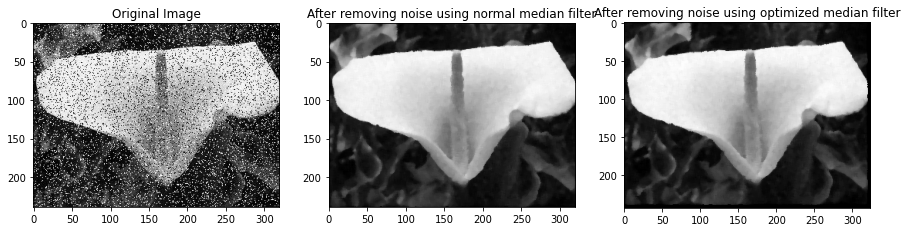

In [4]:
img = cv2.imread("../images/Noisy.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

k=5
img_m = med_filter(img,filt,k)
img_o = med_filter_optim(img,filt,k)

images = [img,img_m,img_o]
strie = ['Original Image', 'After removing noise using normal median filter','After removing noise using optimized median filter']
plottie_1d(3,images,strie)

In the above filters, k=5

# Question 2

## Question 2.1

In [6]:
img = cv2.imread("../images/bell.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

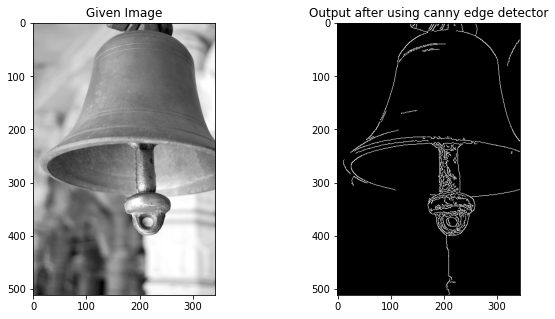

In [7]:
edges = cv2.Canny(img,70,200)
images = [img,edges]
strie = ['Given Image', 'Output after using canny edge detector']
plottie_1d(2,images,strie)

### For bell.jpg  min_val = 50 and max_val = 200

## Question 2.3

In [8]:
img = cv2.imread("../images/kobe.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

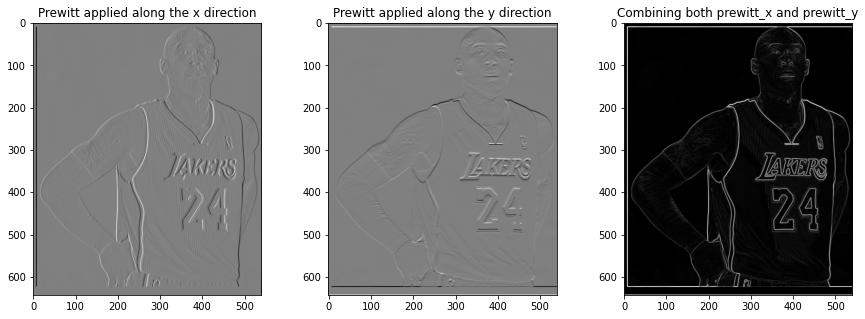

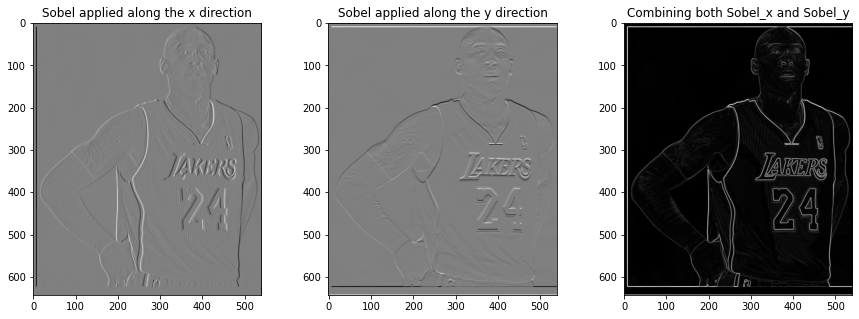

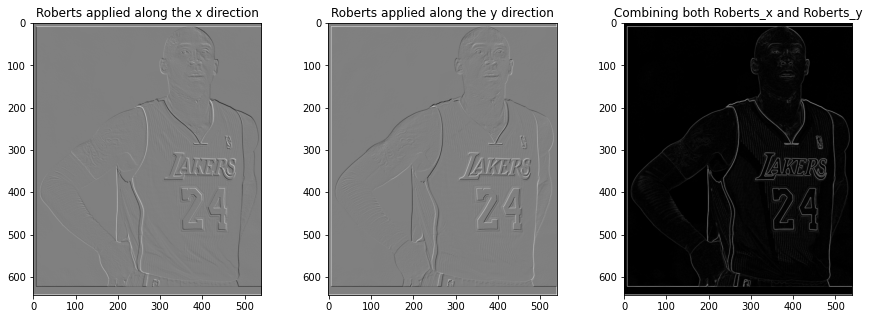

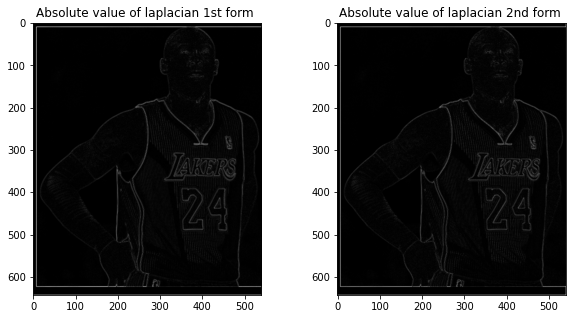

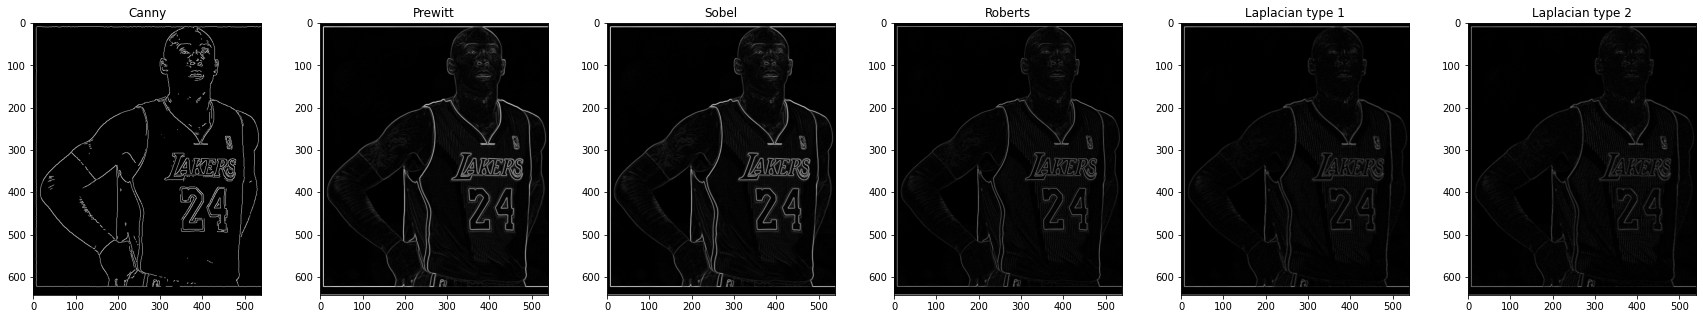

In [10]:
"""

Prewitt

"""

k=3
filt = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

img_prewitt_x = lin_filter(img,filt,k) # X

filt = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])

img_prewitt_y = lin_filter(img,filt,k) # Y

final_p = np.sqrt(img_prewitt_x**2 + img_prewitt_y**2)

images=[img_prewitt_x,img_prewitt_y,final_p]
strie = ['Prewitt applied along the x direction','Prewitt applied along the y direction','Combining both prewitt_x and prewitt_y']
plottie_1d(3,images,strie)


"""
Sobel

"""
k=3
filt = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])

img_sobel_x = lin_filter(img,filt,k)


filt = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
img_sobel_y = lin_filter(img,filt,k)

final_s = np.sqrt(img_sobel_x**2 + img_sobel_y**2)

images=[img_sobel_x,img_sobel_y,final_s]
strie = ['Sobel applied along the x direction','Sobel applied along the y direction','Combining both Sobel_x and Sobel_y']
plottie_1d(3,images,strie)

"""

Roberts

"""
k=3
filt_x = np.array([[0,0,0],[0,0,1],[0,-1,0]]) #padded with zeros for odd filter
filt_y = np.array([[0,0,0],[0,1,0],[0,0,-1]])


img_robert_x = lin_filter(img,filt_x,k)

img_robert_y = lin_filter(img,filt_y,k)

final_r = np.sqrt(img_robert_x**2 + img_robert_y**2)

images=[img_robert_x,img_robert_y,final_r]
strie = ['Roberts applied along the x direction','Roberts applied along the y direction','Combining both Roberts_x and Roberts_y']
plottie_1d(3,images,strie)

"""

Laplacian

"""
k=3
filt = np.array([[1,1,1],[1,-8,1],[1,1,1]])
filt_1 = np.array([[0,1,0],[1,-4,1],[0,1,0]])


img_lap1 =lin_filter(img,filt,k)
img_lap2 =lin_filter(img,filt_1,k)

final_l1 = np.abs(img_lap1)
final_l2 = np.abs(img_lap2)

images=[final_l1,final_l2]
strie = ['Absolute value of laplacian 1st form ','Absolute value of laplacian 2nd form ']
plottie_1d(2,images,strie)

"""

Canny

"""

edges = cv2.Canny(img,150,200)
images = [edges,final_p,final_s,final_r,final_l1,final_l2]
strie = ['Canny', 'Prewitt','Sobel','Roberts','Laplacian type 1','Laplacian type 2']
plottie_1d(6,images,strie)

1. First we observe that both roberts and laplacian filters are very faint.
2. Prewitt is the best out of all the filters that we have implemented (excluding canny). 
3. Sobel and prewitt look very similar (even their kernels look very similar).
4. Canny does the best job in preserving the edges in the facial regions compared to the other filters.

Why canny works better-

1. It has an inbuilt gaussian filter which helps it better handle noise (shown in 2.5).
2. It detects edges using some thresholding.
3. It is manually adjustable by chaning the min and max val.

### For kobe.png min_val = 150 and max_val = 200

# 2.4 (5x5)


Prewit X 5x5:
$\begin{bmatrix} 2 & 2 & 2 & 2 & 2 \\ 1 & 1 & 1 & 1 & 1 \\ 0 & 0 & 0 & 0 & 0 \\ -1 & -1 & -1 & -1 & -1 \\ -2 & -2 & -2 & -2 & -2  \end{bmatrix}$

Sobel X 5x5:
$\begin{bmatrix} 2 & 2 & 4 & 2 & 2 \\ 1 & 1 & 2 & 1 & 1 \\ 0 & 0 & 0 & 0 & 0 \\ -1 & -1 & -2 & -1 & -1 \\ -2 & -2 & -4 & -2 & -2  \end{bmatrix}$

For the Y filter, we take the transpose of the X filter .

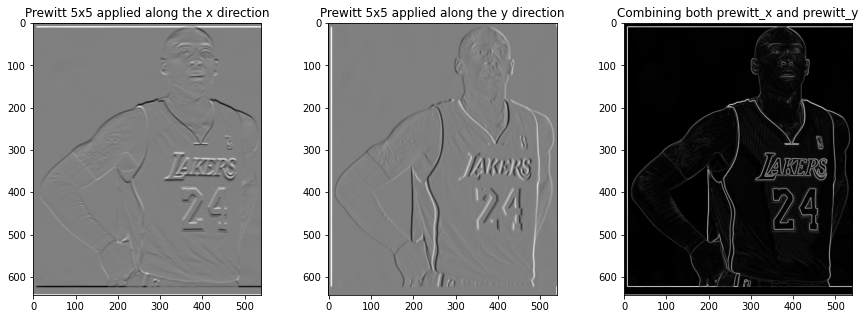

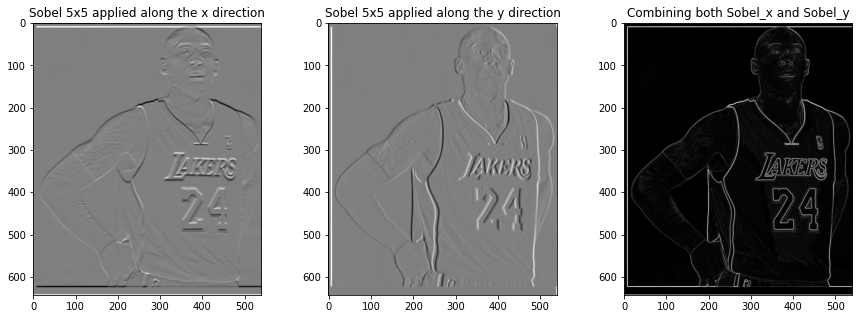

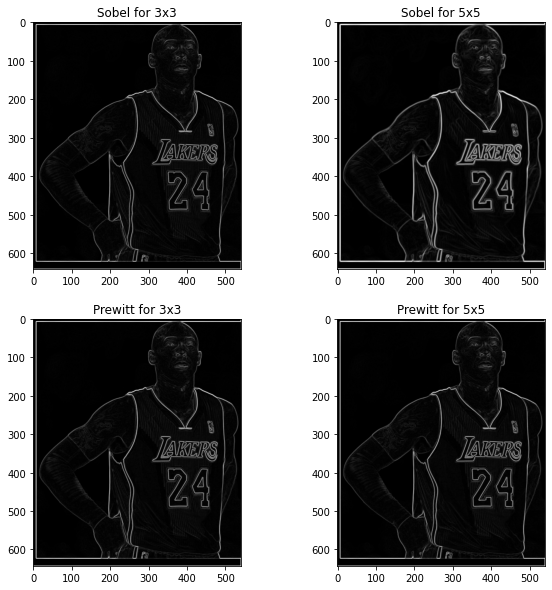

In [220]:
"""

Prewitt

"""

k=5
filt = np.array([[2,2,2,2,2],[1,1,1,1,1],[0,0,0,0,0],[-1,-1,-1,-1,-1],[-2,-2,-2,-2,-2]]) # 5x5 variant of prewitt

img_prewitt_x = lin_filter(img,filt,k) # X

img_prewitt_y = lin_filter(img,filt.T,k) # Y

final_p_5 = np.sqrt(img_prewitt_x**2 + img_prewitt_y**2)

images=[img_prewitt_x,img_prewitt_y,final_p]
strie = ['Prewitt 5x5 applied along the x direction','Prewitt 5x5 applied along the y direction','Combining both prewitt_x and prewitt_y']
plottie_1d(3,images,strie)


"""
Sobel

"""
k=5
filt = np.array([[2,2,4,2,2],[1,1,2,1,1],[0,0,0,0,0],[-1,-1,-2,-1,-1],[-2,-2,-4,-2,-2]]) # 5x5 variant of sobel

img_sobel_x = lin_filter(img,filt,k)

img_sobel_y = lin_filter(img,filt.T,k)

final_s_5 = np.sqrt(img_sobel_x**2 + img_sobel_y**2)

images=[img_sobel_x,img_sobel_y,final_s]
strie = ['Sobel 5x5 applied along the x direction','Sobel 5x5 applied along the y direction','Combining both Sobel_x and Sobel_y']
plottie_1d(3,images,strie)

images=[final_s ,final_s_5 ,final_p ,final_p ]
strie =['Sobel for 3x3','Sobel for 5x5','Prewitt for 3x3','Prewitt for 5x5']
plottie_2d(2,2,images,strie)

1. We observe that the 5x5 do a better job in bringing out the edges. Oberve that the edges of the Tshirts are much brighter in both prewitt (5x5) and sobel (5x5).
2. Sobel (5x5) does a better job in bringing out the edges compared to prewitt (5x5). Their kernel structures support this observation.
3. The larger filters highlight the edges better.

# 2.5 - Adding noise

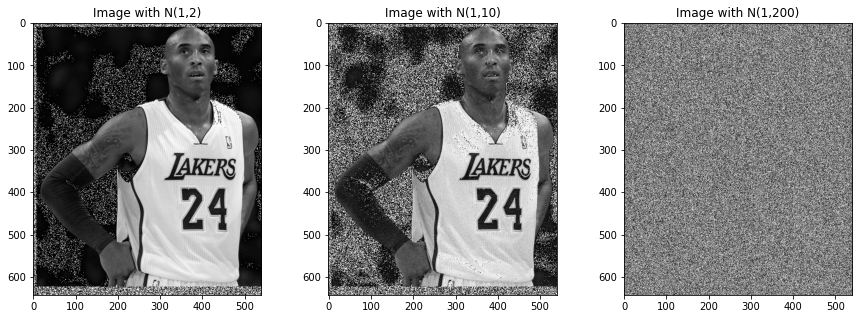

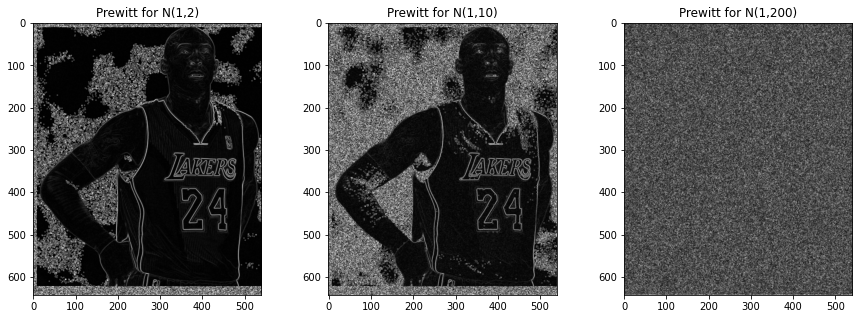

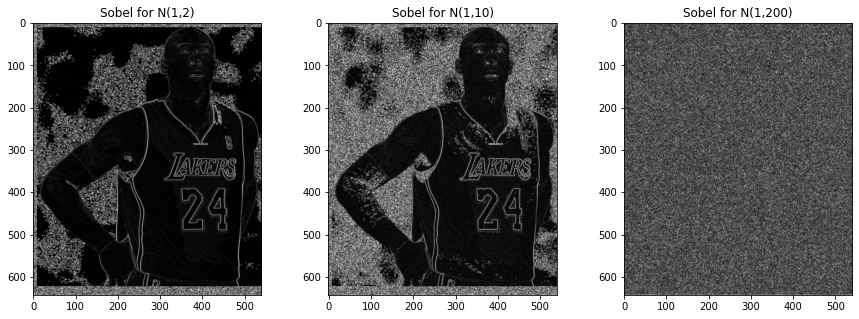

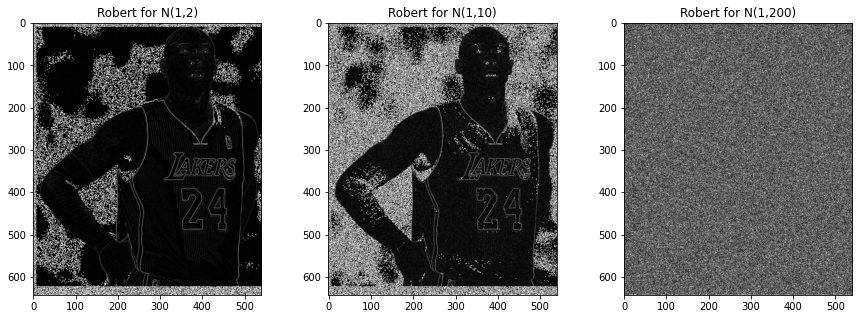

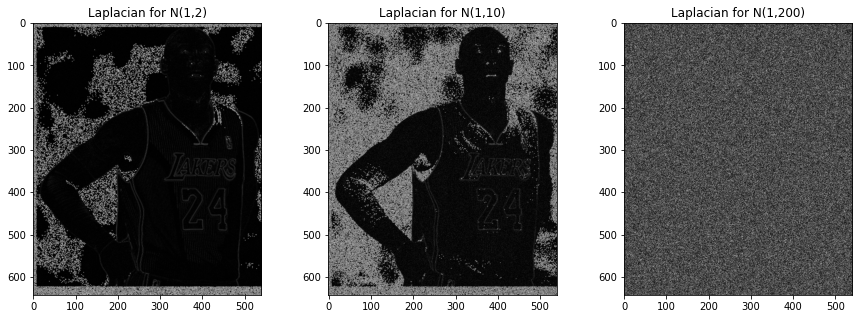

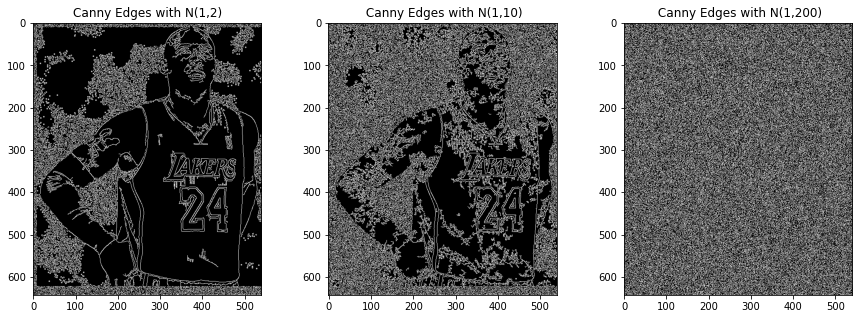

In [25]:
edges = cv2.Canny(img,150,200)
images = [edges,final_p,final_s,final_r,final_l]
# strie = ['Canny', 'Prewitt','Sobel','Roberts','Laplacian']
# plottie_1d(5,images,strie)

mu, sigma = 1, 2 # mean and standard deviation
s = np.random.normal(mu, sigma, img.shape).astype(np.uint8)
img_noise_1 = img +s
edges_noise_1 = cv2.Canny(img_noise_1,50,200)

mu, sigma = 1, 10 # mean and standard deviation
s = np.random.normal(mu, sigma, img.shape).astype(np.uint8)
img_noise_2 = img +s
edges_noise_2 = cv2.Canny(img_noise_2,50,200)

mu, sigma = 1, 200 # mean and standard deviation
s = np.random.normal(mu, sigma, img.shape).astype(np.uint8)
img_noise_3 = img +s
edges_noise_3 = cv2.Canny(img_noise_3,50,200)

images=[img_noise_1  ,img_noise_2 ,img_noise_3 ]
strie =['Image with N(1,2)','Image with N(1,10)','Image with N(1,200)']
plottie_1d(3,images,strie)

"""

Prewitt

"""

k=3
filt = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

img_prewitt_x = lin_filter(img_noise_1,filt,k) # X

filt = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])

img_prewitt_y = lin_filter(img_noise_1,filt,k) # Y

final_p1 = np.sqrt(img_prewitt_x**2 + img_prewitt_y**2)

k=3
filt = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

img_prewitt_x = lin_filter(img_noise_2,filt,k) # X

filt = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])

img_prewitt_y = lin_filter(img_noise_2,filt,k) # Y

final_p2 = np.sqrt(img_prewitt_x**2 + img_prewitt_y**2)

k=3
filt = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

img_prewitt_x = lin_filter(img_noise_3,filt,k) # X

filt = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])

img_prewitt_y = lin_filter(img_noise_3,filt,k) # Y

final_p3 = np.sqrt(img_prewitt_x**2 + img_prewitt_y**2)

images=[final_p1,final_p2,final_p3]
strie = ['Prewitt for N(1,2)','Prewitt for N(1,10)','Prewitt for N(1,200)']
plottie_1d(3,images,strie)


"""
Sobel

"""
k=3
filt = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])

img_prewitt_x = lin_filter(img_noise_1,filt,k) # X

filt = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])

img_prewitt_y = lin_filter(img_noise_1,filt,k) # Y

final_s1 = np.sqrt(img_prewitt_x**2 + img_prewitt_y**2)

k=3
filt = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

img_prewitt_x = lin_filter(img_noise_2,filt,k) # X

filt = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])

img_prewitt_y = lin_filter(img_noise_2,filt,k) # Y

final_s2 = np.sqrt(img_prewitt_x**2 + img_prewitt_y**2)

k=3
filt = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

img_prewitt_x = lin_filter(img_noise_3,filt,k) # X

filt = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])

img_prewitt_y = lin_filter(img_noise_3,filt,k) # Y

final_s3 = np.sqrt(img_prewitt_x**2 + img_prewitt_y**2)

images=[final_s1,final_s2,final_s3]
strie = ['Sobel for N(1,2)','Sobel for N(1,10)','Sobel for N(1,200)']
plottie_1d(3,images,strie)

"""

Roberts

"""
k=3
filt_x = np.array([[0,0,0],[0,0,1],[0,-1,0]])
filt_y = np.array([[0,0,0],[0,1,0],[0,0,-1]])


img_robert_x = lin_filter(img_noise_1,filt_x,k)

img_robert_y = lin_filter(img_noise_1,filt_y,k)

final_r1 = np.sqrt(img_robert_x**2 + img_robert_y**2)

img_robert_x = lin_filter(img_noise_2,filt_x,k)

img_robert_y = lin_filter(img_noise_2,filt_y,k)

final_r2 = np.sqrt(img_robert_x**2 + img_robert_y**2)

img_robert_x = lin_filter(img_noise_3,filt_x,k)

img_robert_y = lin_filter(img_noise_3,filt_y,k)

final_r3 = np.sqrt(img_robert_x**2 + img_robert_y**2)

images=[final_r1,final_r2,final_r3]
strie = ['Robert for N(1,2)','Robert for N(1,10)','Robert for N(1,200)']
plottie_1d(3,images,strie)

"""

Laplacian

"""
k=3
filt = np.array([[1,1,1],[1,-8,1],[1,1,1]])


img_lap =lin_filter(img_noise_1,filt,k)

final_l1 = np.abs(img_lap)

img_lap =lin_filter(img_noise_2,filt,k)

final_l2 = np.abs(img_lap)

img_lap =lin_filter(img_noise_3,filt,k)

final_l3 = np.abs(img_lap)

images=[final_l1,final_l2,final_l3]
strie = ['Laplacian for N(1,2)','Laplacian for N(1,10)','Laplacian for N(1,200)']
plottie_1d(3,images,strie)

# """

# Canny

# """

images=[edges_noise_1 ,edges_noise_2,edges_noise_3 ]
strie =['Canny Edges with N(1,2)',' Canny Edges with N(1,10)',' Canny Edges with N(1,200)']
plottie_1d(3,images,strie)

Observations-

1. Canny looks very noisy compared to the others. (can be handled by changing the max and min values)
2. Roberts looks darker compared to prewitt and sobel.
3. We also observe that laplacian is less noisy because it does double differentiation


Here, the filters we are applying basically calculate the 1st or the 2nd derivatives. As we know, derivatives are severely affected by small changes, which is why the outputs of the filters are corrupted.

As we keep adding more noise, the difference between two consecutive pixels keeps increasing (incresing the derivative) thus Canny will detect more edges.

Here, I did not test the (5x5) filters as the code was running very slowly and the results can we extrapolated from the (3x3) filters

# Question 3.1

In [222]:
img = cv2.imread("../images/mountain.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)


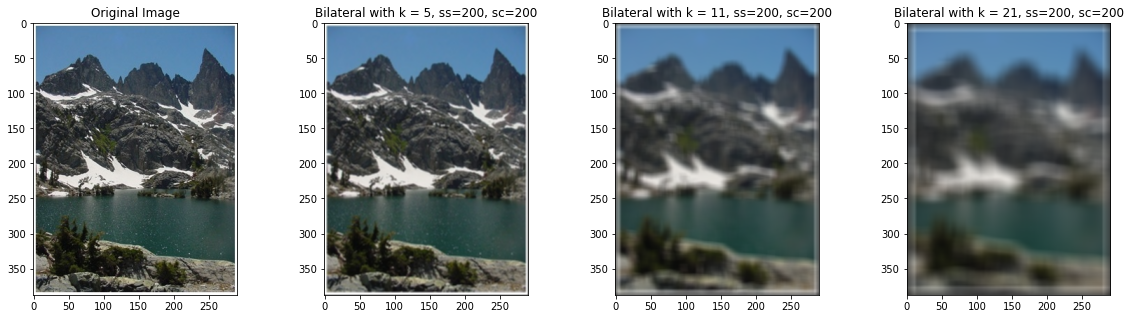

In [224]:
def exp_r(u,p,s):
    s = -2*(s**2)
    final = np.exp((np.linalg.norm(np.asarray(u-p))**2 )/s)
    return final

def exp_i(u,p,s):
    s = -2*(s**2)
    final = np.exp(((np.abs(u-p)))/s)
    return final

def bilateral_filter(img,s_r,s_i,k):
    
    m,n=img.shape
    
    img_pad = np.zeros((m+((k//2)*2),n+((k//2)*2))) # Creating the padded image
    m_pad,n_pad = img_pad.shape


    img_pad[k//2:m_pad-k//2,k//2:n_pad-k//2] = img # Including the image in the padded image
#     print(np.allclose(img_pad, np.pad(img, (k//2,))))

    img_final = np.zeros_like(img_pad) # Creating the final image
    
    filt_r = np.empty((k,k), dtype=np.float64)
    
    for i in range(k):
        for j in range(k):
            filt_r[i,j] = exp_r(np.asarray([k//2,k//2]),np.asarray([i,j]),s_r)

    for i in range(k//2,m_pad-k//2):
        for j in range(k//2,n_pad-k//2):
            den=0
            num=0
            center_intensity = img_pad[i,j]
            slicey = img_pad[i-k//2:i+k//2+1,j-k//2:j+k//2+1]

            output_slicey = exp_i(np.asarray(center_intensity),np.asarray(slicey),s_i)
            
            num = np.sum(np.multiply(filt_r,np.multiply(output_slicey,slicey)))
            den = np.sum(np.multiply(filt_r,output_slicey))
            
            img_final[i,j]=num//den
    img_final = np.uint8(np.round(img_final))
    img_finalest = img_final[k//2:m_pad-k//2,k//2:n_pad-k//2]
#     print("done")
    return img_finalest
sigc = 200
sigs = 200
k = 3

img_0 = bilateral_filter(img[:,:,0],sigs,sigc,k)
img_1 = bilateral_filter(img[:,:,1],sigs,sigc,k)
img_2 = bilateral_filter(img[:,:,2],sigs,sigc,k)

images_1 = [img_0, img_1, img_2]
final_1 = np.stack(images_1,axis=2)
# show_img(final,1)

sigc = 200
sigs = 200
k = 11

img_0 = bilateral_filter(img[:,:,0],sigs,sigc,k)
img_1 = bilateral_filter(img[:,:,1],sigs,sigc,k)
img_2 = bilateral_filter(img[:,:,2],sigs,sigc,k)

images_2 = [img_0, img_1, img_2]
final_2 = np.stack(images_2,axis=2)
# show_img(final,1)

sigc = 200
sigs = 200
k = 21

img_0 = bilateral_filter(img[:,:,0],sigs,sigc,k)
img_1 = bilateral_filter(img[:,:,1],sigs,sigc,k)
img_2 = bilateral_filter(img[:,:,2],sigs,sigc,k)

images_3 = [img_0, img_1, img_2]
final_3 = np.stack(images_3,axis=2)


images = [img,final_1,final_2,final_3]
strie = ['Original Image', 'Bilateral with k = 5, ss=200, sc=200','Bilateral with k = 11, ss=200, sc=200','Bilateral with k = 21, ss=200, sc=200']
plottie_1d(4,images,strie)

# 3.2 and 3.3

done
done
done


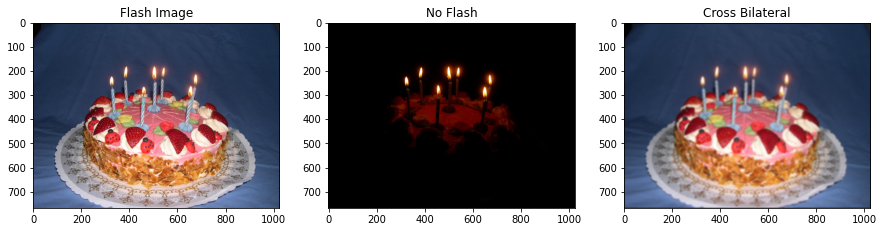

In [225]:
def crossbilateral_filter(img_f,img_nf,s_r,s_i,k):
    
    m,n=img_f.shape
    
    img_pad_f = np.zeros((m+((k//2)*2),n+((k//2)*2))) # Creating the padded image
    m_pad,n_pad = img_pad_f.shape


    img_pad_f[k//2:m_pad-k//2,k//2:n_pad-k//2] = img_f # Including the image in the padded image

    img_final = np.zeros_like(img_pad_f) # Creating the final image
    
    
    m,n=img_nf.shape
    
    img_pad_nf = np.zeros((m+((k//2)*2),n+((k//2)*2))) # Creating the padded image
    m_pad,n_pad = img_pad_nf.shape


    img_pad_nf[k//2:m_pad-k//2,k//2:n_pad-k//2] = img_nf # Including the image in the padded image

    filt_r = np.empty((k,k), dtype=np.float64)
    for i in range(k):
        for j in range(k):
            filt_r[i,j] = exp_r(np.asarray([k//2,k//2]),np.asarray([i,j]),s_r)
            

    for i in range(k//2,m_pad-k//2):
        for j in range(k//2,n_pad-k//2):
            
            den=0
            num=0
            center_intensity = img_pad_nf[i,j]
            slicey_f = img_pad_f[i-k//2:i+k//2+1,j-k//2:j+k//2+1]
            slicey_nf = img_pad_nf[i-k//2:i+k//2+1,j-k//2:j+k//2+1]

            output_slicey_nf = exp_i(np.asarray(slicey_nf),np.asarray(center_intensity),s_i)
            
            num = np.sum(np.multiply(filt_r,np.multiply(output_slicey_nf,slicey_f)))
            den = np.sum(np.multiply(filt_r,output_slicey_nf))
            
            img_final[i,j]=num/den
            
    img_final = np.round(img_final).astype(np.uint8) 
    img_finalest = img_final[k//2:m_pad-k//2,k//2:n_pad-k//2]
    print("done")
    return img_finalest


img_f = cv2.imread("../images/cake_flash.jpg")
img_f = cv2.cvtColor(img_f,cv2.COLOR_BGR2RGB)

img_nf = cv2.imread("../images/cake_noflash.jpg")
img_nf = cv2.cvtColor(img_nf,cv2.COLOR_BGR2RGB)

si = 45
sr = 10
k = 9

img_0 = crossbilateral_filter(img_f[:,:,0],img_nf[:,:,0],sr,si,k)
img_1 = crossbilateral_filter(img_f[:,:,1],img_nf[:,:,1],sr,si,k)
img_2 = crossbilateral_filter(img_f[:,:,2],img_nf[:,:,2],sr,si,k)

images = [img_0, img_1, img_2]
final_f = np.stack(images,axis=2)


images = [img_f,img_nf,final_f]
strie = ['Flash Image', 'No Flash','Cross Bilateral']
plottie_1d(3,images,strie)

Here,

1. si = 45 (photometric weights)
2. sr = 10 (gaussian weights)
3. k = 9 (filter size)


# Question 4

In [226]:
img = cv2.imread("../images/lambo.png")
img_color = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_color1 = np.copy(img_color)
img_color2 = np.copy(img_color) 

# 1.Applying the bilateral filter
num_bilateral = 4 # number of bilateral filtering steps
for _ in range(num_bilateral):

    img_color_0 = bilateral_filter(img_color[:,:,0],
                                    100,100,5)
    img_color_1 = bilateral_filter(img_color[:,:,1],
                                    100,100,5)
    img_color_2 = bilateral_filter(img_color[:,:,2],
                                    100,100,5)
    images = [ img_color_0,  img_color_1,  img_color_2]
    img_color = np.stack(images,axis=2)

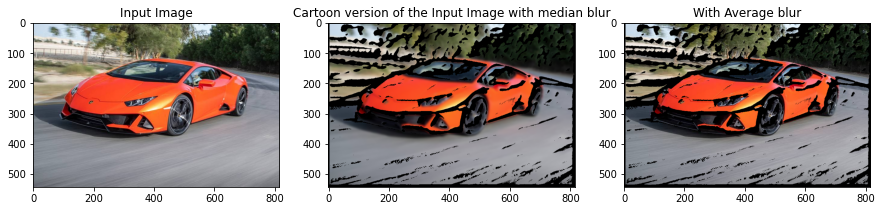

In [227]:
def adaptive_filter(img,k,c):
    
    m,n = img.shape

    img_final = np.zeros_like(img) # Creating the final image
    
    
    for i in range(k,m-k//2): 

        for j in range(k,n-k//2):
            
            row_right = j+k 
            row_left = j
            column_bottom = i+k
            column_top = i

            slicey=img[column_top:column_bottom,row_left:row_right]

            mean =  np.mean(slicey)

    
            if (img[i,j]<=(mean+c)):
                img_final[i,j]=255

    return img_final


# 2. Convert to grayscale 
img_gray = cv2.cvtColor(img_color, cv2.COLOR_RGB2GRAY)

k=7

# 3. Applying blurring (both mean and median)
filt = np.ones((k,k))/k**2
img_blur_b = med_filter(img_gray,filt,k)
img_blur_l = lin_filter(img_gray,filt,k)
img_blur_b = img_blur.astype(np.uint8)
img_blur_l = img_blur.astype(np.uint8)


#4. Creating an edge mask using adaptive filtering
img_edge_b = adaptive_filter(img_blur_b,5,2)
img_edge_l = adaptive_filter(img_blur_l,5,2)

#5 Bitwise AND
img_color[img_edge_b==0] = [0,0,0]
img_color2[img_edge_l==0] = [0,0,0]


images = [img_color1,img_color,img_color2]
strie = ['Input Image', 'Cartoon version of the Input Image with median blur','With Average blur']
plottie_1d(3,images,strie)

### Question 5.1

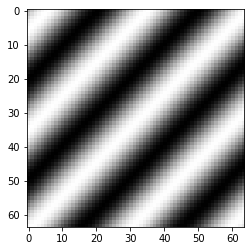

In [16]:
img = cv2.imread("../images/rotation.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (64,64), interpolation = cv2.INTER_AREA)
plt.imshow(img,cmap='gray')
plt.show()

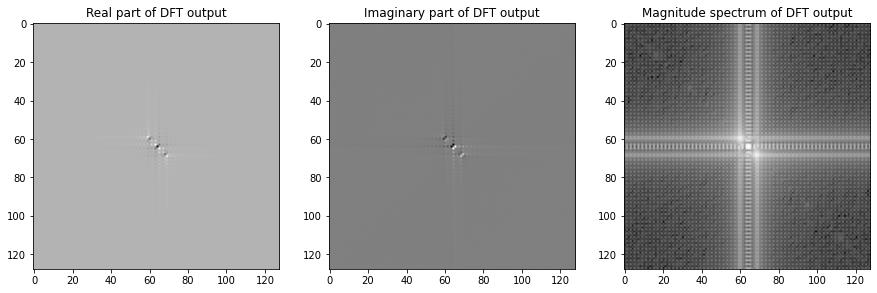

In [17]:
def dft1d(img1d):
    
    N = img1d.shape[0]

    y = np.arange(0,img1d.shape[0],1)

    factor = np.outer(y,y)

    factor_exp = np.exp((1j*2*np.pi*factor)/(-N))
    final = factor_exp@img1d
    return final
    

def dft2d(img):
    M,N = img.shape
    FFT_result = np.zeros_like(img, dtype=complex)
    
    for i in range(M):
        FFT_result[i,:] = dft1d(img[i,:])

    for j in range(N):
        FFT_result[:, j] = dft1d(FFT_result[:, j])
    
        
    return FFT_result


def dft(img):
    
    M,N = img.shape


    yarr = np.arange(0,2*N,1)
    yarr1 = yarr
    
    for i in range(2*M):
        yarr1+=1
        yarr = np.vstack((yarr,yarr1))


    shift = np.exp(-1j*np.pi*yarr)
    
    img_p = np.zeros((2*M,2*N),dtype=complex)
    img_p[0:M,0:N] =  img

    img_p = np.multiply(img_p,shift[1:,:])
    
    freq = dft2d(img_p)
    magnitude_spectrum = 20*np.log(np.abs(freq))
    return freq,magnitude_spectrum

    
freq,mag_spectrum = dft(img)

images = [freq.real,freq.imag,mag_spectrum]
strie = ['Real part of DFT output', 'Imaginary part of DFT output','Magnitude spectrum of DFT output']
plottie_1d(3,images,strie)

### Question 5.2

Is the code working correctly? True


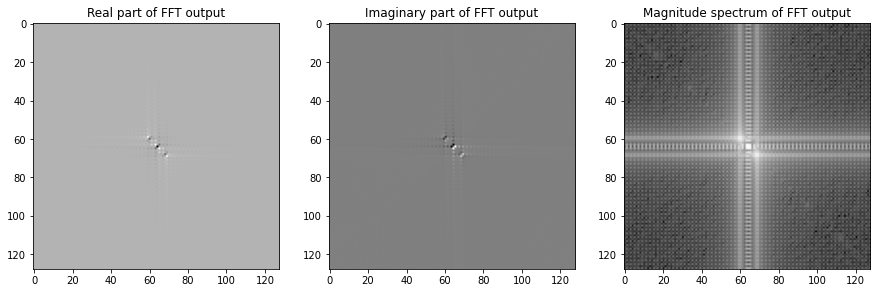

In [18]:
def fft1d(img1d):
    
    N = img1d.shape[0]

    X = np.zeros((1,N),dtype=np.complex128)
    
    if N==2:

        X = dft1d(img1d)
        
    else:

        
        even_elem = img1d[0:N-1:2]
        odd_elem = img1d[1:N:2]

        
        even_fft = fft1d(even_elem)
        odd_fft = fft1d(odd_elem)

        X = np.zeros((1,N),dtype=np.complex128)
        xarr = np.arange(0,N,1)
        
        NN=-N
        xexp = np.exp((1j*2*np.pi*xarr)/NN)
        
        X_top = even_fft + np.multiply(xexp[0:(N//2)],odd_fft)
        X_bottom = even_fft + np.multiply(xexp[N//2:N],odd_fft)
        X = np.concatenate((X_top,X_bottom))

    return X



def fft2d(img):
    M,N = img.shape


    yarr = np.arange(0,2*N,1)
    yarr1 = yarr
    
    for i in range(2*M):
        yarr1+=1
        yarr = np.vstack((yarr,yarr1))

    img_p = np.zeros((2*M,2*N),dtype=complex)
    img_p[0:M,0:N] =  img

    shift = np.exp(-1j*np.pi*yarr)

    img_p = np.multiply(img_p,shift[1:,:])
    

    FFT_result = np.zeros_like(img_p, dtype=complex)
    
    for i in range(2*M):
        FFT_result[i,:] = fft1d(img_p[i,:])

    for j in range(2*N):
        FFT_result[:, j] = fft1d(FFT_result[:, j])

#     print("Is the code working correctly?", np.allclose(np.fft.fft(img_p), fft1d(img_p)))
    return FFT_result,20*np.log(np.abs(FFT_result))

fft,mag_spectrum = fft2d(img)
print("Is the code working correctly?", np.allclose(fft, freq))
images = [fft.real,fft.imag,mag_spectrum]
strie = ['Real part of FFT output', 'Imaginary part of FFT output','Magnitude spectrum of FFT output']
plottie_1d(3,images,strie)

In [8]:
x_val = [64,128,256,512]
time_dft=[]
time_fft=[]
for img in images_gray:
    
    t0 = time.time()
    freq,mag_spectrum = dft(img)
    t1 = time.time()
    time_dft.append(t1-t0)
    
    t0 = time.time()
    fft,mag_spectrum = fft2d(img)
    t1 = time.time()
    time_fft.append(t1-t0)


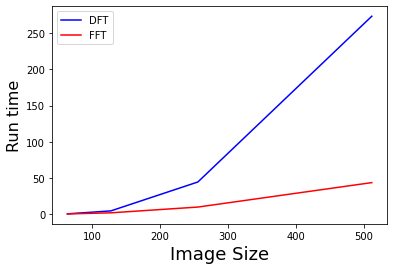

In [9]:
plt.plot(x_val,time_dft, 'b',x_val,time_fft, 'r')
plt.legend(['DFT','FFT'])
plt.xlabel('Image Size', fontsize=18)
plt.ylabel('Run time', fontsize=16)
plt.show()

# 5.3 Inverse FFT

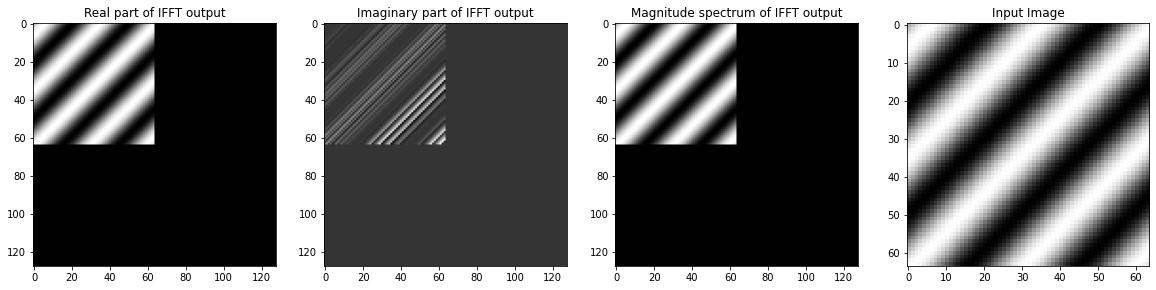

In [19]:
def dft1dinv(img1d):
    
    N = img1d.shape[0]

    y = np.arange(0,img1d.shape[0],1)

    factor = np.outer(y,y)

    factor_exp = np.exp((1j*2*np.pi*factor)/(N))
    final = (factor_exp@img1d)
    return final


def fft1dinv(img1d):
    
    N = img1d.shape[0]

    X = np.zeros((1,N),dtype=np.complex128)
    
    if N==2:

        X = dft1dinv(img1d)
        
    else:

        
        even_elem = img1d[0:N-1:2]
        odd_elem = img1d[1:N:2]

        sizey = even_elem.size
        even_fft = fft1dinv(even_elem)
        odd_fft = fft1dinv(odd_elem)
        X = np.zeros((1,N),dtype=np.complex128)
        xarr = np.arange(0,N,1)
        
        NN=N
        xexp = np.exp((1j*2*np.pi*xarr)/NN)
        
#         print(N)
        X_top = (even_fft + np.multiply(xexp[0:(N//2)],odd_fft))
        X_bottom = (even_fft + np.multiply(xexp[N//2:N],odd_fft))
        X = np.concatenate((X_top,X_bottom))

    return X

def fft_final(img):
    return fft1dinv(img)/img.shape[0]

def fft2dinv(img):
    
    M,N = img.shape
    

    FFT_result = np.zeros_like(img, dtype=complex)

    for i in range(N):
        FFT_result[:,i] = fft_final(img[:,i])

    for j in range(M):
        FFT_result[j, :] = fft_final(FFT_result[j, :])
        
    FFT_result1 = FFT_result.copy()
    M,N = FFT_result.shape
    
    yarr = np.arange(0,N,1)
    yarr1 = yarr
    
    for i in range(M):
        yarr1+=1
        yarr = np.vstack((yarr,yarr1))
        
    shift = np.exp(-1j*np.pi*yarr)

    FFT_result2 = np.multiply(FFT_result1,shift[1:,:])

    return FFT_result2,np.abs(FFT_result2)

inv_fft,view = fft2dinv(fft)
images = [inv_fft.real,inv_fft.imag,view,img]
strie = ['Real part of IFFT output', 'Imaginary part of IFFT output','Magnitude spectrum of IFFT output','Input Image']
plottie_1d(4,images,strie)


# 5.4

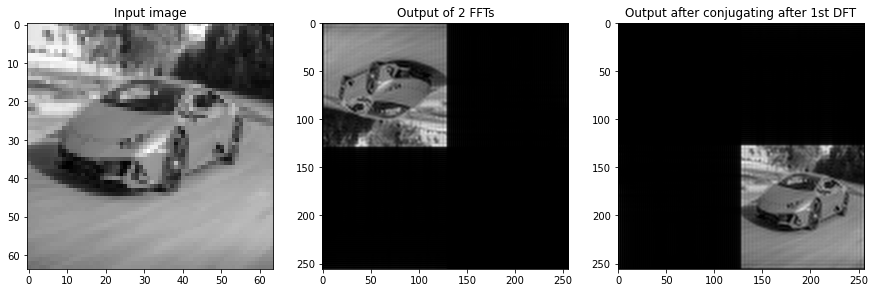

In [23]:
img = cv2.imread("../images/lambo.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (64,64), interpolation = cv2.INTER_AREA)

fft,mag_spectrum = fft2d(img)
fft_cong = np.conj(fft)
fft,mag_spectrum = fft2d(fft)
fft_lol,mag_spectrum = fft2d(fft_cong)

images = [img,np.abs(fft),(np.abs(fft_lol))]
strie = ['Input image','Output of 2 FFTs','Output after conjugating after 1st DFT']
plottie_1d(3,images,strie)

Applying fourier transform twice gives us the spacially inverse form of the image


Applying fourier transform on the image
$$
F[x] = \sum_{n=0}^{N-1} f[n]*e^{(-j*2pi*n*x)/N}
$$
If we apply fourier transform one more time, the exponent will become positive. In order to make it negative, we have to change the term in f[n] to f[-n] which basically means spacial inversion.


In order to correct it, we have to conjugate it in the frequency domain after the first DFT in order to ensure that the sign of n in f[n] does not change thus preventing spacial inversion.

# Question 6.1

In [279]:
img1 = cv2.imread("../images/lambo.png")
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img1 = cv2.resize(img1, (256,256), interpolation = cv2.INTER_AREA)

img2 = cv2.imread("../images/mountain.jpg")
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
img2 = cv2.resize(img2, (256,256), interpolation = cv2.INTER_AREA)

In [280]:
m,n=img1.shape

# Flipping the seconde image about its rows and columns for convolution
img2 = np.flip(img2,0) # flipping about the row
img2 = np.flip(img2,1) # Flipping about the column


# Here, I am padding a row and column of zeros in order to use my old spacial filtering code
img1_pad = np.zeros((m+1,n+1)) # Creating the padded image
m_pad,n_pad = img1_pad.shape


img1_pad[1:m_pad,1:n_pad] = img1

img2_pad = np.zeros((m+1,n+1)) # Creating the padded image
img2_pad[1:m_pad,1:n_pad] = img2
m_pad,n_pad = img1_pad.shape


# Convolution
img_optim= lin_filter(img1_pad,img2_pad,m_pad)


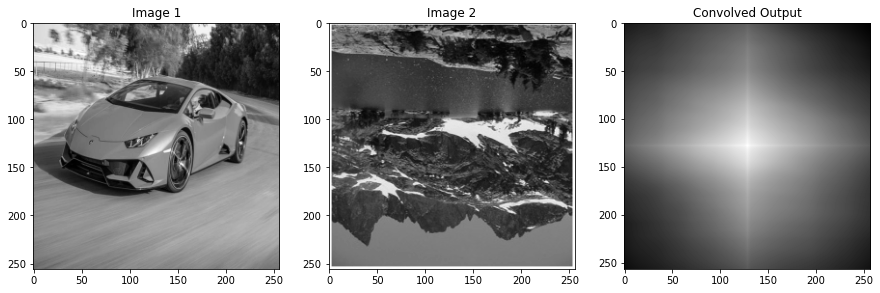

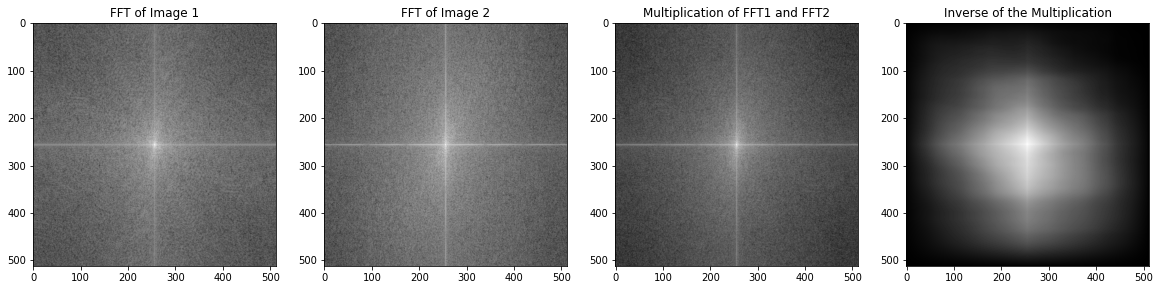

In [281]:
freq1,res1 = fft2d(img1) # FFT of image 1


freq2,res2 = fft2d(img2) # FFT of image 2


final = np.multiply(freq1,freq2) # Point wise multiplication

inv_freq,res = fft2dinv(final) # Inverse FFT

images = [img1,img2,img_optim]
strie = ['Image 1', 'Image 2','Convolved Output']
plottie_1d(3,images,strie)
images = [res1,res2,20*np.log(np.abs(final)),res]
strie = ['FFT of Image 1', 'FFT of Image 2','Multiplication of FFT1 and FFT2','Inverse of the Multiplication']
plottie_1d(4,images,strie)

The images are not similar. Even though multiplication in frequency domain is similar to circular convolution in space domain, the images will not be same the same as the convolution done was linear convolution and multiplication was not zero padded.

## Computing the Central Average

In [285]:
final = np.mean((np.abs(inv_freq[0:257,0:257] - img_optim))**2)
print(final)

3.705976217415596e+17


# Question 6.2 1st part

check


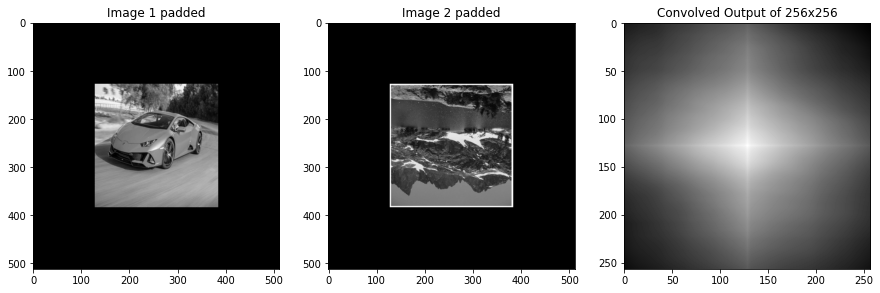

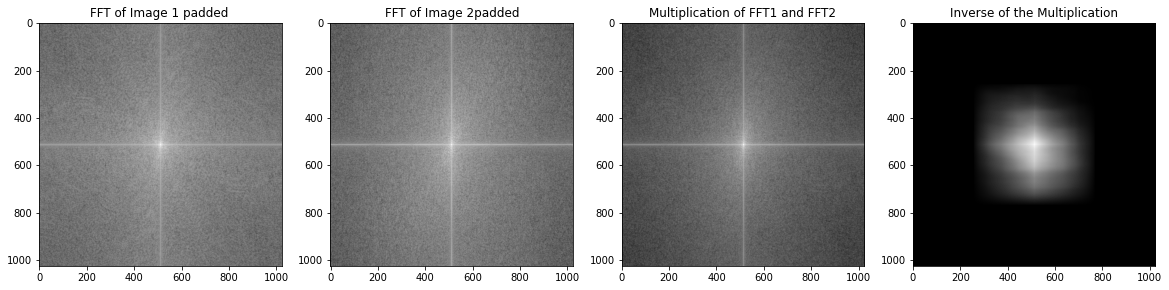

In [271]:
m,n=img1.shape

img1_pad = np.zeros((512,512)) # Creating the 512x512 padded image instead of 511x511 for FFT


img1_pad[128:384,128:384] = img1

img2_pad = np.zeros((512,512)) # Creating the 512x512 padded image instead of 511x511 for FFT
img2_pad[128:384,128:384] = img2
m_pad,n_pad = img1_pad.shape


freq1,res1 = fft2d(img1_pad)


print("check")
freq2,res2 = fft2d(img2_pad)



final = np.multiply(freq1,freq2)

inv_freq_1,res_1 = fft2dinv(final)


images = [img1_pad,img2_pad,img_optim]
strie = ['Image 1 padded', 'Image 2 padded','Convolved Output of 256x256']
plottie_1d(3,images,strie)
images = [res1,res2,20*np.log(np.abs(final)),res_1]
strie = ['FFT of Image 1 padded ', 'FFT of Image 2padded','Multiplication of FFT1 and FFT2','Inverse of the Multiplication']
plottie_1d(4,images,strie)

1. The frequecy domain gets padded with a border of zeros because we pad the spacial image with zeros.

1. We observe that the frequency domain appears to shrink because the spacial domain expands. This demonstrates the inverse relationship with spacial and frequency domain.



In [286]:
final = np.mean((np.abs(inv_freq_1[256:513,256:513] - img_optim))**2)
print(final)

3.705976217415595e+17


The error is the same

# Question 6.2 2nd part

In [287]:
img = cv2.imread("../images/mountain.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (64,64), interpolation = cv2.INTER_AREA)

(128, 128)
(256, 256)
(512, 512)
(1024, 1024)


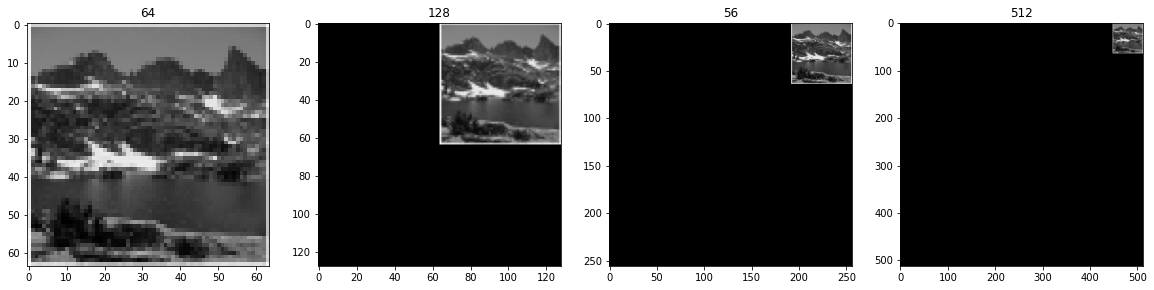

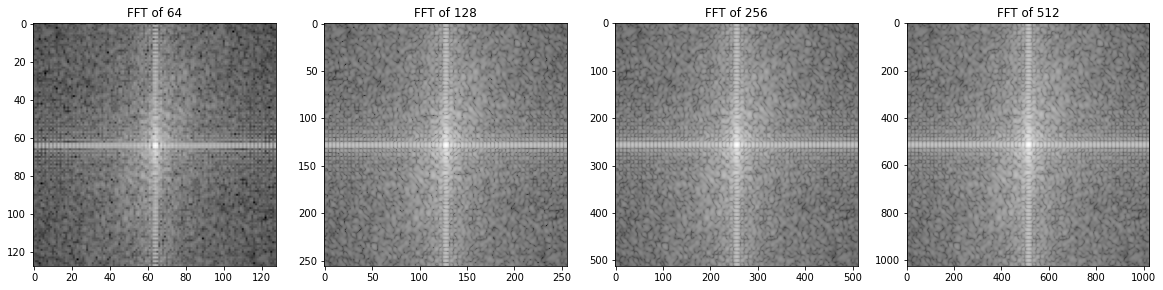

In [288]:
"""
64 x 64
"""

freq0,res0 = fft2d(img)
# show_img(img1_pad,0)
# show_img(res1,0)


"""
128x128
"""

m,n=img.shape
img1_pad = np.zeros((2*m,2*n)) # Creating the padded image
m_pad,n_pad = img1_pad.shape

print(img1_pad.shape)
img1_pad[0:m,n:] = img
freq1,res1 = fft2d(img1_pad)
# show_img(img1_pad,0)
# show_img(res1,0)

"""
256x256
"""

m,n=img1_pad.shape
img2_pad = np.zeros((2*m,2*n)) # Creating the padded image
m_pad,n_pad = img2_pad.shape
img2_pad[0:m,n:] = img1_pad
print(img2_pad.shape)
freq2,res2 = fft2d(img2_pad)
# show_img(img2_pad,0)
# show_img(res2,0)

"""
512x512
"""

m,n=img2_pad.shape
img3_pad = np.zeros((2*m,2*n)) # Creating the padded image
m_pad,n_pad = img3_pad.shape

print(img3_pad.shape)
img3_pad[0:m,n:] = img2_pad
freq3,res3 = fft2d(img3_pad)
print(res3.shape)
# show_img(img3_pad,0)
# show_img(res3,0)

images = [img,img1_pad,img2_pad,img3_pad]
strie = ['64','128', '56','512']
plottie_1d(4,images,strie)

images = [res0,res1,res2,res3]
strie = ['FFT of 64','FFT of 128', 'FFT of 256','FFT of 512']
plottie_1d(4,images,strie)

# print("Is the code working correctly?", np.allclose(freq2, freq3))

Note: I have not extracted the fourier transform from the padded image

If we observe the center of the fourier transform, we observe that it gets larger as the padding gets larger. This shows us the inverse nature of the frequency and space domains. (As the image occupies lesser and lesser space. the fourier transform gets larger).

However, the values themselves will not change because the original image does not change. We just pad the original image with 0s which does not change the frequency content.

# Question 7

#### In this question, I observed that there was a consitent repetitve pattern along the horizontal direction of the image.
#### So, I took the FFT, and removed most of the high frequency components and then did IFFT.

In [160]:
img = cv2.imread("../images/noisy_lena.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

<ipython-input-164-5d4a1b5a0e0b>:26: RuntimeWarning: divide by zero encountered in log
  images = [img,res,20*np.log(np.abs(freq1)),res_interm]


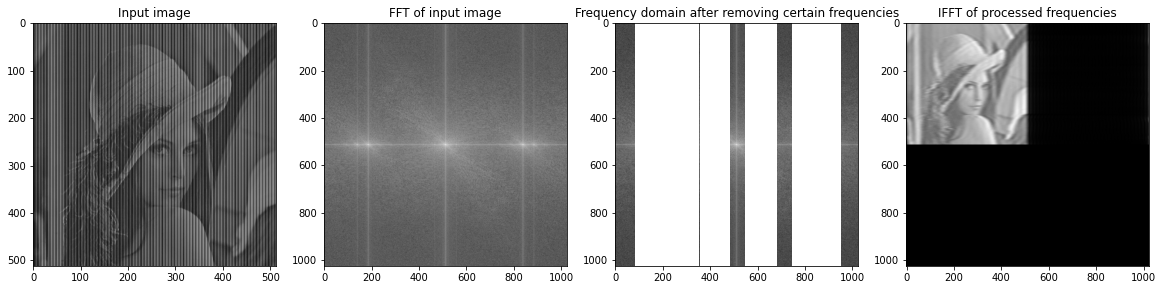

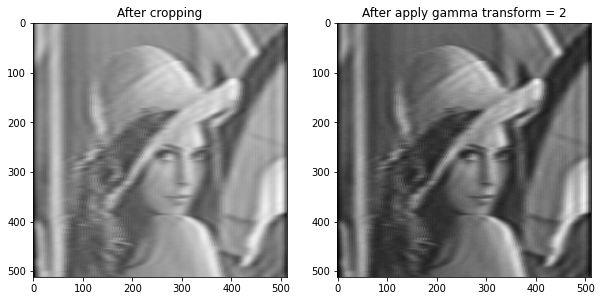

In [164]:
def gammaTransform(img,gamma):
    
    img_final = np.array(255*((img/255)**gamma),dtype='uint8')
    x = np.arange(0, 255, 0.1)
    y_final = np.array(255*((x/255)**gamma),dtype='uint8')
    
    return img_final

freq,res =fft2d(img)
# show_img(res,0)
freq1 = freq

freq1[:,90:350] = 0
freq1[:,360:480] = 0


freq1[:,550:680] = 0
freq1[:,750:950] = 0

inv_freq,res_interm = fft2dinv(freq1)

img_res = res_interm[0:512,0:512]

gamma_im = gammaTransform(img_res,2)

images = [img,res,20*np.log(np.abs(freq1)),res_interm]
strie = ['Input image','FFT of input image', 'Frequency domain after removing certain frequencies','IFFT of processed frequencies']
plottie_1d(4,images,strie)

images = [img_res,gamma_im]
strie = ['After cropping','After apply gamma transform = 2']
plottie_1d(2,images,strie)